Cell ini digunakan untuk memanggil seluruh library yang dibutuhkan dalam proses clustering, mulai dari pengolahan data, visualisasi, normalisasi, hingga evaluasi kualitas cluster.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


Dataset penjualan tiket pesawat dibaca dan ditampilkan lima data teratas untuk memahami struktur awal data.

In [2]:
df = pd.read_csv("penjualan_tiket_pesawat.csv")
df.head()


,Transaction_ID,City,Gender,Date,Ticket_Quantity,Ticket_Price,Airline,Payment_Method,Total
0,1,Medan,Female,2024-03-25,5,1340246.0,Garuda,E-Wallet,6701230.0
1,2,Surabaya,Female,2024-02-15,4,1935645.0,Garuda,Transfer Bank,7742580.0
2,3,Medan,Female,2024-01-24,4,949000.0,Citilink,Transfer Bank,3796000.0
3,4,Medan,Female,2024-01-05,5,1506013.0,Lion Air,E-Wallet,7530065.0
4,5,Jakarta,Male,2024-01-30,3,842715.0,Lion Air,E-Wallet,2528145.0


Tahap ini bertujuan untuk:

Mengetahui jumlah data dan tipe variabel

Memastikan tidak ada nilai kosong

Memahami distribusi statistik fitur numerik sebelum clustering

In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   500 non-null    int64  
 1   City             500 non-null    object 
 2   Gender           500 non-null    object 
 3   Date             500 non-null    object 
 4   Ticket_Quantity  500 non-null    int64  
 5   Ticket_Price     500 non-null    float64
 6   Airline          500 non-null    object 
 7   Payment_Method   500 non-null    object 
 8   Total            500 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 35.3+ KB


,Transaction_ID,Ticket_Quantity,Ticket_Price,Total
count,500.000000,500.000000,5.000000e+02,5.000000e+02
mean,250.500000,3.032000,1.251348e+06,3.793494e+06
std,144.481833,1.383765,4.433147e+05,2.265379e+06
min,1.000000,1.000000,5.092100e+05,5.280000e+05
25%,125.750000,2.000000,8.493028e+05,1.889234e+06
50%,250.500000,3.000000,1.233666e+06,3.485085e+06
75%,375.250000,4.000000,1.649518e+06,5.244934e+06
max,500.000000,5.000000,1.997273e+06,9.972850e+06


Cell ini digunakan untuk menentukan fitur yang akan digunakan dalam proses clustering.
Pemilihan fitur dilakukan agar clustering:

Tidak bias

Menggunakan informasi yang relevan

Menghasilkan cluster yang bermakna

In [4]:
data = df[['Ticket_Quantity', 'Ticket_Price']]


Cell ini digunakan untuk mengidentifikasi keberadaan outlier (nilai ekstrem) pada fitur numerik yang digunakan dalam clustering, yaitu:

Ticket_Quantity

Ticket_Price

Pemeriksaan outlier penting karena Hierarchical Clustering sangat sensitif terhadap jarak, sehingga nilai ekstrem dapat memengaruhi struktur cluster.

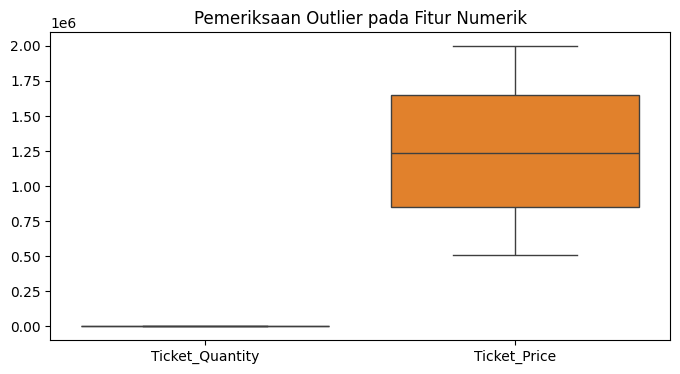

Tidak terdapat outlier ekstrem, namun terdapat perbedaan skala yang signifikan antar fitur, sehingga diperlukan proses normalisasi sebelum hierarchical clustering.


In [15]:
plt.figure(figsize=(8,4))
sns.boxplot(data=data)
plt.title("Pemeriksaan Outlier pada Fitur Numerik")
plt.show()

print("Tidak terdapat outlier ekstrem, namun terdapat perbedaan skala yang signifikan antar fitur, sehingga diperlukan proses normalisasi sebelum hierarchical clustering.")


Cell ini digunakan untuk menyamakan skala fitur sebelum dilakukan proses hierarchical clustering.

Normalisasi diperlukan karena:

Fitur Ticket_Quantity dan Ticket_Price memiliki rentang nilai yang sangat berbeda

Hierarchical clustering menggunakan jarak antar data

Tanpa normalisasi, fitur dengan skala besar akan mendominasi perhitungan jarak.

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


Dendrogram digunakan untuk melihat pola penggabungan data secara hierarkis dan memberikan gambaran awal mengenai struktur cluster. Dendrogram digunakan sebagai alat eksplorasi, bukan penentu final jumlah cluster.

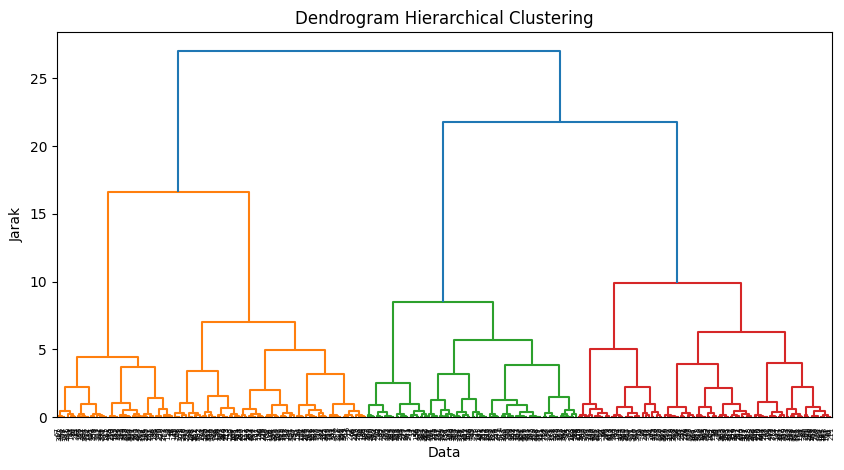

In [7]:
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10,5))
dendrogram(linked)
plt.title("Dendrogram Hierarchical Clustering")
plt.xlabel("Data")
plt.ylabel("Jarak")
plt.show()


Silhouette Score digunakan untuk mengevaluasi kualitas pemisahan cluster. Nilai yang lebih tinggi menunjukkan cluster yang lebih terpisah dengan baik.

In [19]:
print("4 cluster memberikan pemisahan data paling baik")
print("Evaluasi Silhouette Score:")
for k in range(2, 6):
    hc = AgglomerativeClustering(n_clusters=k)
    labels = hc.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"k = {k} → Silhouette = {score:.3f}")


4 cluster memberikan pemisahan data paling baik
Evaluasi Silhouette Score:
k = 2 → Silhouette = 0.349
k = 3 → Silhouette = 0.385
k = 4 → Silhouette = 0.409
k = 5 → Silhouette = 0.401


Menjalankan clustering & memberi label(cluster)

Cell ini digunakan untuk menerapkan hasil evaluasi sebelumnya dan membentuk cluster akhir pada dataset.

jumlah cluster k = 4

In [9]:
hc = AgglomerativeClustering(n_clusters=4)
df['cluster'] = hc.fit_predict(scaled_data)


Cell ini digunakan untuk mengukur kualitas akhir dari hasil clustering dengan jumlah cluster yang sudah dipilih (k = 4).

In [10]:
sil_score = silhouette_score(scaled_data, df['cluster'])
print("Silhouette Score:", sil_score)


Silhouette Score: 0.40880871816840747


Cell ini digunakan untuk menampilkan hasil Hierarchical Clustering dalam bentuk scatter plot berdasarkan jumlah tiket dan harga tiket.
Visualisasi ini bertujuan untuk:
- Melihat persebaran data pada setiap cluster
- Memahami hubungan antar fitur
- Memastikan bahwa cluster yang terbentuk memiliki pola yang dapat dibedakan secara visual

Setiap titik merepresentasikan satu transaksi, sedangkan warna menunjukkan cluster hasil pengelompokan.

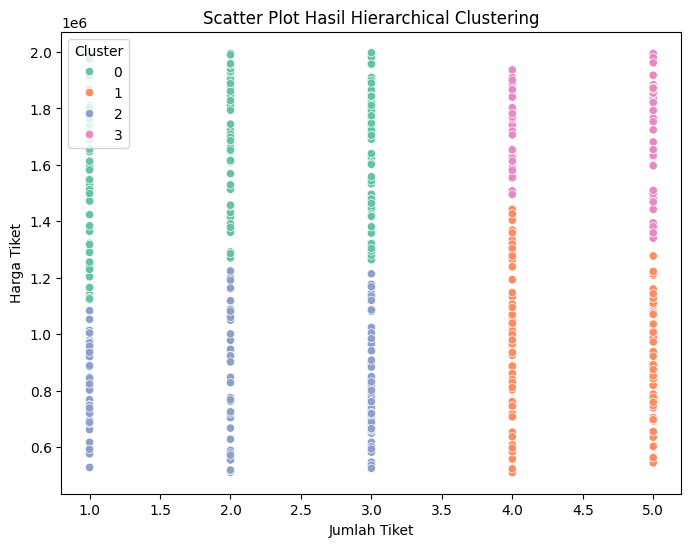

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Ticket_Quantity',
    y='Ticket_Price',
    hue='cluster',
    palette='Set2'
)
plt.title("Scatter Plot Hasil Hierarchical Clustering")
plt.xlabel("Jumlah Tiket")
plt.ylabel("Harga Tiket")
plt.legend(title="Cluster")
plt.show()


Analisis ini digunakan untuk memahami karakteristik tiap cluster berdasarkan rata-rata jumlah tiket dan harga tiket.

In [13]:
df.groupby('cluster')[data.columns].mean()


,Ticket_Quantity,Ticket_Price
cluster,,
0,2.018293,1.612694e+06
1,4.432000,9.617560e+05
2,2.125000,8.229454e+05
3,4.560000,1.720698e+06


Simpan Hasil Clustering

In [14]:
df.to_csv("hasil_hierarchical_clustering.csv", index=False)


Metode Hierarchical Clustering digunakan untuk mengelompokkan data penjualan tiket pesawat berdasarkan kemiripan jumlah tiket dan harga tiket. Normalisasi data dilakukan untuk memastikan perhitungan jarak tidak bias terhadap skala fitur.

Dendrogram digunakan sebagai alat eksplorasi struktur data, sementara jumlah cluster ditentukan berdasarkan evaluasi Silhouette Score. Hasil clustering menunjukkan bahwa data membentuk segmentasi bertingkat dengan pemisahan cluster yang moderat, mengindikasikan pola pembelian yang bersifat kontinu dan saling tumpang tindih.

Segmentasi yang dihasilkan dapat dimanfaatkan sebagai dasar analisis perilaku pelanggan dan pengambilan keputusan strategis berbasis karakteristik transaksi.